## Import Data and Basic Data Explore

**import data set**

In [36]:
import pandas as pd

# import dataset
# Read the CSV file and store it as DataFrame
df = pd.read_csv('melb_house_withnum.csv')

# Check the first few rows of the dataset to ensure the import was successful
print(df.head())

       SUBURB           ADDRESS  ROOMS TYPE      PRICE METHOD SELLERG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        DATE  DISTANCE  POSTCODE  ...  CAR  LANDSIZE  BUILDINGAR  YEARBUILT  \
0  3/12/2016       2.5    3067.0  ...  1.0     202.0         NaN        NaN   
1  4/02/2016       2.5    3067.0  ...  0.0     156.0        79.0     1900.0   
2  4/03/2017       2.5    3067.0  ...  0.0     134.0       150.0     1900.0   
3  4/03/2017       2.5    3067.0  ...  1.0      94.0         NaN        NaN   
4  4/06/2016       2.5    3067.0  ...  2.0     120.0       142.0     2014.0   

   COUNCILARE  LATTITUDE LONGTITUDE             REGIONNAME  PROPERTYCO AREANUM  
0    

**deal with missing values**

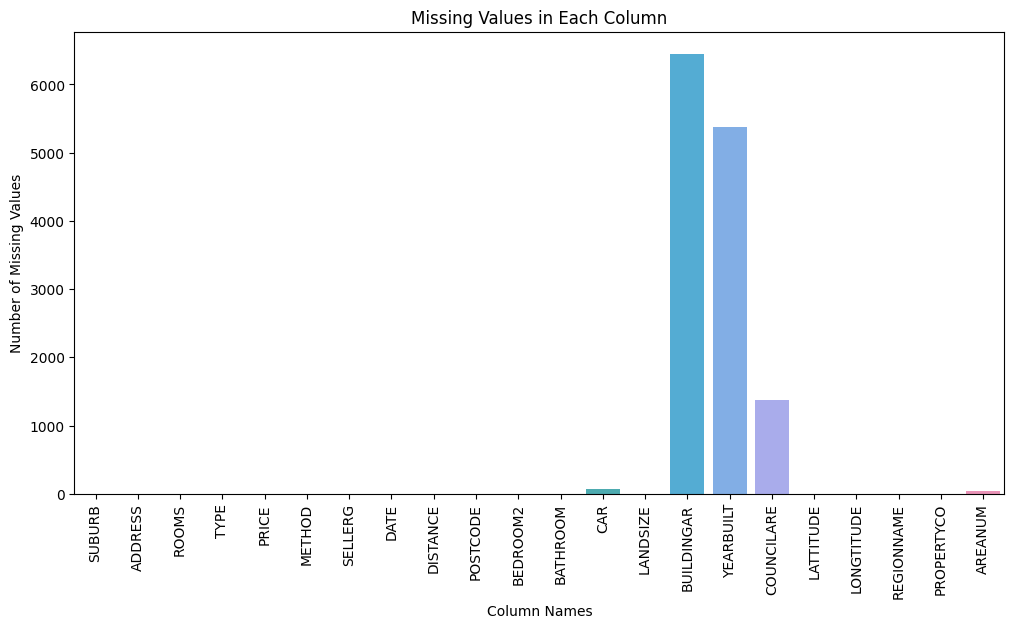

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in each column
missing_data = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

In [38]:
missing_data

SUBURB           0
ADDRESS          0
ROOMS            0
TYPE             0
PRICE            0
METHOD           0
SELLERG          0
DATE             0
DISTANCE         0
POSTCODE         0
BEDROOM2         0
BATHROOM         0
CAR             62
LANDSIZE         0
BUILDINGAR    6450
YEARBUILT     5375
COUNCILARE    1369
LATTITUDE        0
LONGTITUDE       0
REGIONNAME       0
PROPERTYCO       0
AREANUM         46
dtype: int64

The dataset exhibits missing values in several columns:

1. The "CAR" column has 62 missing values, indicating that information regarding the number of parking spaces is absent for these entries.

2. In the "BUILDINGAR" column, a substantial number of values, precisely 6,450, are missing, indicating a lack of data regarding the building area for these properties.

3. The "YEARBUILT" column displays 5,375 missing values, implying that data pertaining to the construction year of these properties is unavailable.

4. For the "COUNCILARE" column, there are 1,369 missing values, signifying the absence of data concerning the council area of these properties.

5. Lastly, the "AREANUM" column has 46 missing values, indicating that area-related information is missing for these particular entries.

These observations highlight the presence of missing data in various columns of the dataset, which may necessitate data imputation or other preprocessing steps depending on the analytical objectives.ocessing method.

There is a large amount of missing data in some columns. Replacing it with the most frequently occurring data may lead to deviations in subsequent modeling. String type data is also difficult to process using the average or median.

So here we use deletion of missing values as a processing method.

In [39]:
# Delete rows containing missing values
df_cleaned = df.dropna()

In [40]:
# Check whether there are still missing values in the processed data set
missing_data_cleaned = df_cleaned.isnull().sum()

#Print out the missing values in the processed data set
print(missing_data_cleaned)

SUBURB        0
ADDRESS       0
ROOMS         0
TYPE          0
PRICE         0
METHOD        0
SELLERG       0
DATE          0
DISTANCE      0
POSTCODE      0
BEDROOM2      0
BATHROOM      0
CAR           0
LANDSIZE      0
BUILDINGAR    0
YEARBUILT     0
COUNCILARE    0
LATTITUDE     0
LONGTITUDE    0
REGIONNAME    0
PROPERTYCO    0
AREANUM       0
dtype: int64


Check the statistics of numeric data in the data set:

In [41]:
# Analyze statistics of different columns
column_stats = df_cleaned.describe()

#Print statistics
print(column_stats)

             ROOMS         PRICE     DISTANCE     POSTCODE     BEDROOM2  \
count  6177.000000  6.177000e+03  6177.000000  6177.000000  6177.000000   
mean      2.932977  1.069791e+06     9.756597  3101.744051     2.903675   
std       0.971439  6.756000e+05     5.617601    86.454275     0.970558   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.200000e+05     5.900000  3043.000000     2.000000   
50%       3.000000  8.800000e+05     9.100000  3081.000000     3.000000   
75%       4.000000  1.326000e+06    12.400000  3147.000000     3.000000   
max       8.000000  9.000000e+06    47.400000  3977.000000     9.000000   

          BATHROOM          CAR      LANDSIZE   BUILDINGAR    YEARBUILT  \
count  6177.000000  6177.000000   6177.000000  6177.000000  6177.000000   
mean      1.577465     1.574713    471.738546   141.725485  1964.094544   
std       0.711806     0.930361    898.527027    90.904745    38.126657   
min       1.000000     0

In [42]:
# Analyze the statistics of non-numeric columns
categorical_stats = df_cleaned.describe(include='object')

#Print statistics
print(categorical_stats)

           SUBURB           ADDRESS  TYPE METHOD SELLERG        DATE  \
count        6177              6177  6177   6177    6177        6177   
unique        284              6098     3      5     203          51   
top     Reservoir  36 Aberfeldie St     h      S  Nelson  27/05/2017   
freq          154                 3  4081   3944     763         224   

       COUNCILARE             REGIONNAME  
count        6177                   6177  
unique         31                      8  
top      Moreland  Southern Metropolitan  
freq          658                   2150  


In [43]:
# Output the column names of the DataFrame
column_names = df_cleaned.columns
print(column_names)

Index(['SUBURB', 'ADDRESS', 'ROOMS', 'TYPE', 'PRICE', 'METHOD', 'SELLERG',
       'DATE', 'DISTANCE', 'POSTCODE', 'BEDROOM2', 'BATHROOM', 'CAR',
       'LANDSIZE', 'BUILDINGAR', 'YEARBUILT', 'COUNCILARE', 'LATTITUDE',
       'LONGTITUDE', 'REGIONNAME', 'PROPERTYCO', 'AREANUM'],
      dtype='object')


Here are the various features (columns) in the dataset and what they represent:

1. **SUBURB**: The name of the city or suburb where the house is located.

2. **ADDRESS**: The specific address of the house.

3. **ROOMS**: Number of bedrooms in the house.

4. **TYPE**: The type of house, which may be an apartment, a detached house, etc.

5. **PRICE**: The price of a house, usually used as the target variable.

6. **METHOD**: The method by which the home is sold, such as auction or private sale.

7. **SELLERG**: Name of the seller (real estate agent).

8. **DATE**: The date the home was sold.

9. **DISTANCE**: The distance from the house to the city center.

10. **POSTCODE**: Postal code, indicating the postal area where the house is located.

11. **BEDROOM2**: Another measurement of the number of bedrooms.

12. **BATHROOM**: Number of bathrooms.

13. **CAR**: Number of parking spaces.

14. **LANDSIZE**: The size of the land area.

15. **BUILDINGAR**: The size of the building area.

16. **YEARBUILT**: The year the house was built.

17. **COUNCILARE**: The name of a local government area.

18. **LATTITUDE**: The latitude of where the house is located.

19. **LONGTITUDE**: The longitude of where the house is located.

20. **REGIONNAME**: The name of the region where the house is located.

21. **PROPERTYCO**: The name of the property company.

22. **AREANUM**: A numerical code that may represent an area or region.

These features provide a variety of information about each home and its surroundings.

## Feature Selection and Data Preprocessing

**create new variables**

In [44]:
# Create the boundaries of the price range
price_bins = [0, 300000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, float('inf')] # Adjust according to your data

# Create labels for price ranges
price_labels = ['0-300k','300k-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M+']

# Convert price to price range and create new column
df_cleaned['PRICE_INTERVAL'] = pd.cut(df_cleaned['PRICE'], bins=price_bins, labels=price_labels, right=False)

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\2361239352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PRICE_INTERVAL'] = pd.cut(df_cleaned['PRICE'], bins=price_bins, labels=price_labels, right=False)


In [45]:
#Define function to generate distance_interval
def create_distance_interval(distance):
     if distance == 0:
         return '0 km'
     elif distance < 5:
         return '< 5 km'
     elif distance >= 5 and distance < 10:
         return '5-10 km'
     elif distance >= 10 and distance < 15:
         return '10-15 km'
     elif distance >= 15 and distance < 20:
         return '15-20 km'
     elif distance >= 20 and distance < 25:
         return '20-25 km'
     elif distance >= 25 and distance < 30:
         return '25-30 km'
     elif distance >= 30 and distance < 35:
         return '30-35 km'
     elif distance >= 35 and distance < 40:
         return '35-40 km'
     elif distance >= 40 and distance < 45:
         return '40-45 km'
     elif distance >= 45 and distance <= 50:
         return '45-50 km'
     else:
         return '> 50 km'

# Apply function to generate distance_interval column
df_cleaned['DISTANCE_INTERVAL'] = df_cleaned['DISTANCE'].apply(create_distance_interval)

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\485348178.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DISTANCE_INTERVAL'] = df_cleaned['DISTANCE'].apply(create_distance_interval)


In [46]:
#Create a function to divide the year into intervals every 5 years
def create_year_interval(year):
     return f"{int(year // 5) * 5}-{int(year // 5) * 5 + 4}"

# Apply function to create new YEARBUILT_INTERVAL column
df_cleaned['YEARBUILT_INTERVAL'] = df_cleaned['YEARBUILT'].apply(create_year_interval)

# Set the data type of the YEARBUILT_INTERVAL column to category
df_cleaned['YEARBUILT_INTERVAL'] = df_cleaned['YEARBUILT_INTERVAL'].astype('category')

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\3928037289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEARBUILT_INTERVAL'] = df_cleaned['YEARBUILT'].apply(create_year_interval)
C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\3928037289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEARBUILT_INTERVAL'] = df_cleaned['YEARBUILT_INTERVAL'].astype('category')


**Modify Date to Year**

In [47]:
# Assume your date column is named 'DATE'
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'], format='%d/%m/%Y')

# Extract the year and create a new column 'YEAR'
df_cleaned['YEAR'] = df_cleaned['DATE'].dt.year

# If you want to replace the original 'DATE' column, you can use the following code
df_cleaned.drop(columns=['DATE'], inplace=True)

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\3980698823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'], format='%d/%m/%Y')
C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\3980698823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR'] = df_cleaned['DATE'].dt.year
C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [48]:
# Display a portion of the data frame to ensure the 'YEAR' column has been extracted and replaced with 'DATE'
df_cleaned["YEAR"]

1        2016
2        2017
4        2016
6        2016
7        2016
         ... 
12205    2017
12206    2017
12207    2017
12209    2017
12212    2017
Name: YEAR, Length: 6177, dtype: int64

In [49]:
# transfer data type from int64 to object
df_cleaned['YEAR'] = df_cleaned['YEAR'].astype('category')

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\3094432404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR'] = df_cleaned['YEAR'].astype('category')


In [50]:
df_cleaned['POSTCODE'] = df_cleaned['POSTCODE'].astype('category')

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\387456578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['POSTCODE'] = df_cleaned['POSTCODE'].astype('category')


In [51]:
df_cleaned['ADDRESS']

1        25 Bloomburg St
2           5 Charles St
4            55a Park St
6           124 Yarra St
7          98 Charles St
              ...       
12205      30 Sherwin St
12206        75 Cecil St
12207      2/29 Dover Rd
12209    201/152 Peel St
12212    54 Pentland Pde
Name: ADDRESS, Length: 6177, dtype: object

In [52]:
df_cleaned['ADDRESS'] = df_cleaned['ADDRESS'].str.split().str[-2:].str.join(' ')

# Display the first few lines to check the results
print(df_cleaned['ADDRESS'].head())

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\77880361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ADDRESS'] = df_cleaned['ADDRESS'].str.split().str[-2:].str.join(' ')


1    Bloomburg St
2      Charles St
4         Park St
6        Yarra St
7      Charles St
Name: ADDRESS, dtype: object


In [53]:
df_cleaned['AREANUM'] = df_cleaned['AREANUM'].astype('category')

C:\Users\yejiu\AppData\Local\Temp\ipykernel_20596\1168174909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AREANUM'] = df_cleaned['AREANUM'].astype('category')


In [54]:
# Delete the 'PRICE', 'DISTANCE', 'YEARBUILT' columns and apply the changes to the original data frame
df_cleaned.drop(['PRICE', 'DISTANCE', 'YEARBUILT'], axis=1, inplace=True)

In [55]:
df_cleaned.drop(['LATTITUDE', 'LONGTITUDE'], axis=1, inplace=True)

In [56]:
df_cleaned.drop(['PROPERTYCO'], axis=1, inplace=True)

In [57]:
df_cleaned.columns

Index(['SUBURB', 'ADDRESS', 'ROOMS', 'TYPE', 'METHOD', 'SELLERG', 'POSTCODE',
       'BEDROOM2', 'BATHROOM', 'CAR', 'LANDSIZE', 'BUILDINGAR', 'COUNCILARE',
       'REGIONNAME', 'AREANUM', 'PRICE_INTERVAL', 'DISTANCE_INTERVAL',
       'YEARBUILT_INTERVAL', 'YEAR'],
      dtype='object')

In [58]:
# Get all column names with data type 'object'
object_columns = df_cleaned.select_dtypes(include=['object']).columns

# Change the data type of these columns to 'category'
df_cleaned[object_columns] = df_cleaned[object_columns].astype('category')

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [59]:
# Select columns containing category data type
df_cat = df_cleaned.select_dtypes(include=['category']).drop(['PRICE_INTERVAL'], axis = 1)

# Select columns that do not contain category data type and exclude 'PRICE_INTERVAL' column
df_num = df_cleaned.select_dtypes(exclude=['category'])

In [60]:
df_cat.columns

Index(['SUBURB', 'ADDRESS', 'TYPE', 'METHOD', 'SELLERG', 'POSTCODE',
       'COUNCILARE', 'REGIONNAME', 'AREANUM', 'DISTANCE_INTERVAL',
       'YEARBUILT_INTERVAL', 'YEAR'],
      dtype='object')

In [61]:
df_num.columns

Index(['ROOMS', 'BEDROOM2', 'BATHROOM', 'CAR', 'LANDSIZE', 'BUILDINGAR'], dtype='object')

In [62]:
from scipy.stats import chi2_contingency

# Assume df_cat is a DataFrame containing categorical variables
# Create a blank correlation matrix
correlation_matrix = pd.DataFrame(index=df_cat.columns, columns=df_cat.columns)

# Calculate the chi-square correlation for each pair of variables
for var1 in df_cat.columns:
     for var2 in df_cat.columns:
         if var1 != var2:
             contingency_table = pd.crosstab(df_cat[var1], df_cat[var2])
             _, p, _, _ = chi2_contingency(contingency_table)
             correlation_matrix.loc[var1, var2] = p

# Print correlation matrix
print(correlation_matrix)

                   SUBURB   ADDRESS      TYPE    METHOD   SELLERG POSTCODE  \
SUBURB                NaN       0.0       0.0       0.0       0.0      0.0   
ADDRESS               0.0       NaN       0.0  0.263491       0.0      0.0   
TYPE                  0.0       0.0       NaN       0.0       0.0      0.0   
METHOD                0.0  0.263491       0.0       NaN       0.0      0.0   
SELLERG               0.0       0.0       0.0       0.0       NaN      0.0   
POSTCODE              0.0       0.0       0.0       0.0       0.0      NaN   
COUNCILARE            0.0       0.0       0.0       0.0       0.0      0.0   
REGIONNAME            0.0       0.0       0.0       0.0       0.0      0.0   
AREANUM               0.0       0.0       0.0       0.0       0.0      0.0   
DISTANCE_INTERVAL     0.0       0.0       0.0       0.0       0.0      0.0   
YEARBUILT_INTERVAL    0.0       1.0       0.0  0.000035  0.897946      0.0   
YEAR                  0.0  0.006262  0.133645  0.000002       0.

| features             | p-value     |
|------------------|------------|
| ADDRESS          | 0.263491   |
| TYPE             | 0.133645   |
| SELLERG          | 0.897946   |
| REGIONNAME       | no data         |
| AREANUM          | no data       |
| DISTANCE_INTERVAL | no data         |

In [63]:
#Import necessary libraries
import seaborn as sns

# Calculate the correlation coefficient matrix
correlation_matrix = df_num.corr()

# Output correlation data
print(correlation_matrix)

               ROOMS  BEDROOM2  BATHROOM       CAR  LANDSIZE  BUILDINGAR
ROOMS       1.000000  0.951769  0.613754  0.422074  0.098274    0.607719
BEDROOM2    0.951769  1.000000  0.617714  0.425151  0.096657    0.592509
BATHROOM    0.613754  0.617714  1.000000  0.340833  0.075978    0.533923
CAR         0.422074  0.425151  0.340833  1.000000  0.117294    0.333767
LANDSIZE    0.098274  0.096657  0.075978  0.117294  1.000000    0.084378
BUILDINGAR  0.607719  0.592509  0.533923  0.333767  0.084378    1.000000


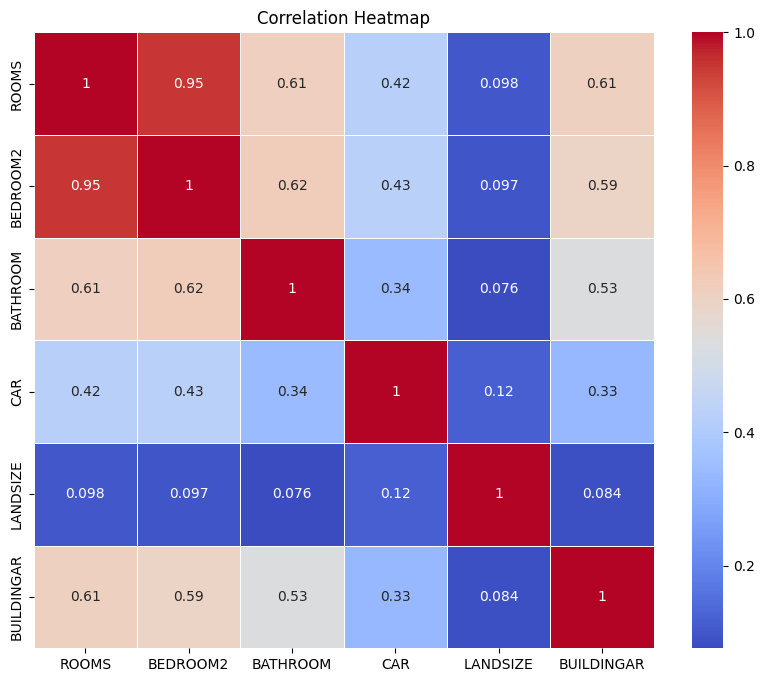

In [64]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The selected features are: ROOMS, BATHROOM, CAR, LANDSIZE and BUILDINGAR.

In [65]:
# Select required features
selected_features = ['ADDRESS', 'TYPE', 'SELLERG', 'REGIONNAME', 'AREANUM', 'DISTANCE_INTERVAL',
                     'ROOMS', 'BATHROOM', 'CAR', 'LANDSIZE', 'BUILDINGAR', "PRICE_INTERVAL"]

#Create a new data set df_selected
df_selected = df_cleaned[selected_features]

# Check the first few rows of the new dataset
print(df_selected.head())

        ADDRESS TYPE SELLERG             REGIONNAME AREANUM DISTANCE_INTERVAL  \
1  Bloomburg St    h  Biggin  Northern Metropolitan     3.0            < 5 km   
2    Charles St    h  Biggin  Northern Metropolitan     3.0            < 5 km   
4       Park St    h  Nelson  Northern Metropolitan     3.0            < 5 km   
6      Yarra St    h  Nelson  Northern Metropolitan     3.0            < 5 km   
7    Charles St    h  Nelson  Northern Metropolitan     3.0            < 5 km   

   ROOMS  BATHROOM  CAR  LANDSIZE  BUILDINGAR PRICE_INTERVAL  
1      2       1.0  0.0     156.0        79.0        1M-1.5M  
2      3       2.0  0.0     134.0       150.0        1M-1.5M  
4      4       1.0  2.0     120.0       142.0        1.5M-2M  
6      3       2.0  0.0     245.0       210.0        1.5M-2M  
7      2       1.0  2.0     256.0       107.0        1.5M-2M  


In [66]:
# df_selected.to_csv('df_selected.csv', index=False)

## Building Models

In [67]:
df_selected

,ADDRESS,TYPE,SELLERG,REGIONNAME,AREANUM,DISTANCE_INTERVAL,ROOMS,BATHROOM,CAR,LANDSIZE,BUILDINGAR,PRICE_INTERVAL
1,Bloomburg St,h,Biggin,Northern Metropolitan,3.0,< 5 km,2,1.0,0.0,156.0,79.00,1M-1.5M
2,Charles St,h,Biggin,Northern Metropolitan,3.0,< 5 km,3,2.0,0.0,134.0,150.00,1M-1.5M
4,Park St,h,Nelson,Northern Metropolitan,3.0,< 5 km,4,1.0,2.0,120.0,142.00,1.5M-2M
6,Yarra St,h,Nelson,Northern Metropolitan,3.0,< 5 km,3,2.0,0.0,245.0,210.00,1.5M-2M
7,Charles St,h,Nelson,Northern Metropolitan,3.0,< 5 km,2,1.0,2.0,256.0,107.00,1.5M-2M
...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Sherwin St,h,Ray,Northern Victoria,5.0,35-40 km,3,2.0,1.0,972.0,149.00,500k-1M
12206,Cecil St,h,Williams,Western Metropolitan,8.0,5-10 km,3,1.0,0.0,179.0,115.00,1M-1.5M
12207,Dover Rd,u,Williams,Western Metropolitan,8.0,5-10 km,1,1.0,1.0,0.0,35.64,300k-500k
12209,Peel St,u,hockingstuart,Southern Metropolitan,6.0,< 5 km,2,1.0,1.0,0.0,61.60,500k-1M


In [68]:
df_selected.dtypes

ADDRESS              category
TYPE                 category
SELLERG              category
REGIONNAME           category
AREANUM              category
DISTANCE_INTERVAL    category
ROOMS                   int64
BATHROOM              float64
CAR                   float64
LANDSIZE              float64
BUILDINGAR            float64
PRICE_INTERVAL       category
dtype: object

In [69]:
# 从 df_cleaned 中选择除 "PRICE_INTERVAL" 列之外的所有分类变量
categorical_columns = df_selected.select_dtypes(include=['category']).columns.drop(['PRICE_INTERVAL'])

# 使用 get_dummies 进行独热编码
df_dummies = pd.get_dummies(df_selected, columns=categorical_columns)

In [70]:
df_dummies.dtypes

ROOMS                           int64
BATHROOM                      float64
CAR                           float64
LANDSIZE                      float64
BUILDINGAR                    float64
                               ...   
DISTANCE_INTERVAL_35-40 km      uint8
DISTANCE_INTERVAL_40-45 km      uint8
DISTANCE_INTERVAL_45-50 km      uint8
DISTANCE_INTERVAL_5-10 km       uint8
DISTANCE_INTERVAL_< 5 km        uint8
Length: 3281, dtype: object

### Random Forest Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variables (y)
X = df_dummies.drop(columns=['PRICE_INTERVAL'])
y = df_dummies['PRICE_INTERVAL']

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different random forest model parameters
models = [
     {'n_estimators': 100, 'max_depth': None, 'random_state': 42},
     {'n_estimators': 50, 'max_depth': 10, 'random_state': 42},
     {'n_estimators': 200, 'max_depth': 5, 'random_state': 42},
     {'n_estimators': 150, 'max_depth': 15, 'random_state': 42},
     {'n_estimators': 100, 'max_depth': 20, 'random_state': 42}
]

# Train multiple random forest models
for model_params in models:
     rf_model = RandomForestClassifier(**model_params)
     rf_model.fit(X_train, y_train)
    
     y_pred = rf_model.predict(X_test)

     accuracy = accuracy_score(y_test, y_pred)
     precision = precision_score(y_test, y_pred, average='weighted')
     recall = recall_score(y_test, y_pred, average='weighted')
     f1 = f1_score(y_test, y_pred, average='weighted')
     auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')
     cm = confusion_matrix(y_test, y_pred)
    
     print(f"Model parameters: {model_params}")
     print(f"Accuracy: {accuracy}")
     print(f"Precision: {precision}")
     print(f"Recall rate: {recall}")
     print(f"F1 score: {f1}")
     print(f"AUC: {auc}")
     print("Confusion Matrix:")
     print(cm)
     print("--------------------------")

| Model Parameters                                 | Accuracy | Precision | Recall Rate | F1 Score | AUC       |
|--------------------------------------------------|----------|-----------|-------------|----------|-----------|
| {'n_estimators': 100, 'max_depth': None, 'random_state': 42}  | 0.6788   | 0.6654    | 0.6788      | 0.6641   | 0.9143    |
| {'n_estimators': 50, 'max_depth': 10, 'random_state': 42}    | 0.4636   | 0.2149    | 0.4636      | 0.2937   | 0.8804    |
| {'n_estimators': 200, 'max_depth': 5, 'random_state': 42}    | 0.4636   | 0.2149    | 0.4636      | 0.2937   | 0.8715    |
| {'n_estimators': 150, 'max_depth': 15, 'random_state': 42}   | 0.4838   | 0.4158    | 0.4838      | 0.3534   | 0.8967    |
| {'n_estimators': 100, 'max_depth': 20, 'random_state': 42}   | 0.5720   | 0.5162    | 0.5720      | 0.4992   | 0.9012    |


Based on the provided model parameters and different evaluation indicators, we can make a preliminary interpretation of the model's performance. Here are some observations on the performance of each model:

1. Model 1 (`{'n_estimators': 100, 'max_depth': None, 'random_state': 42}`):
    - The accuracy (Accuracy) is 67.88%, which means that about 67.88% of the samples are correctly classified.
    - The precision (Precision) is 66.54%, indicating that the model's positive category prediction is relatively accurate.
    - The recall rate (Recall Rate) is also 67.88%, indicating that the model successfully captured most of the positive category samples.
    - F1 Score is 66.41%. F1 Score combines precision and recall.
    - AUC of 91.43%, AUC measures the model's performance in multi-category classification tasks.

2. Model 2 (`{'n_estimators': 50, 'max_depth': 10, 'random_state': 42}`) and Model 3 (`{'n_estimators': 200, 'max_depth': 5, 'random_state': 42 }`):
    - Both models have similar performance, but relatively low performance.
    - The accuracy and recall rates are both low, and the precision is also low, indicating that the model performs poorly in classification.
    - The F1 Score is also lower, indicating a trade-off between precision and recall for both models.

3. Model 4 (`{'n_estimators': 150, 'max_depth': 15, 'random_state': 42}`):
    - Accuracy is low at 48.38%.
    - The accuracy is 41.58%, indicating that the model is less accurate in positive class predictions.
    - The recall rate is 48.38%, and the model successfully captures a part of the positive category samples.
    - The F1 Score is 35.34%, indicating that there is room for improvement in the model's performance.
    - The AUC is 89.67%, which is relatively high, but still not enough to show excellent performance.

4. Model 5 (`{'n_estimators': 100, 'max_depth': 20, 'random_state': 42}`):
    - The accuracy is 57.20%, which is relatively high.
    - The accuracy is 51.62%, indicating that the model is relatively accurate in predicting positive classes.
    - The recall rate is 57.20%, and the model successfully captures most of the positive category samples.
    - The F1 Score is 49.92%, indicating good model performance.
    - The AUC is 90.12%. A higher AUC indicates that the model performs better in multi-category classification tasks.

In summary, Model 1 and Model 5 perform relatively well among this set of models, with high accuracy, precision, recall, and F1 Score.

In [ ]:
# save model on local d
import joblib

# Create Model 1 model
model_1_params = {'n_estimators': 100, 'max_depth': None, 'random_state': 42}
model_1 = RandomForestClassifier(**model_1_params)

# Use training data to train the model (assume here that X_train and y_train are defined training data)
model_1.fit(X_train, y_train)

# Save the model locally
model_filename = "model_1.pkl"
joblib.dump(model_1, model_filename)
print(f"Model 1 saved as {model_filename}")

In [ ]:
# Output model parameters
print("Model parameters:")
print(f"Number of trees (n_estimators): {model_1.n_estimators}")
print(f"The maximum depth of the tree (max_depth): {model_1.max_depth}")
print(f"Random seed (random_state): {model_1.random_state}")
print("\n")

# Output feature importance
importances = model_1.feature_importances_
feature_names = X_train.columns # Assume X_train contains feature columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature importance:")
for feature, importance in sorted_feature_importance:
     print(f"{feature}: {importance:.4f}")

Based on the information provided, here is a description of the model:

**Model Parameters:**
- The model uses 100 trees to build a random forest.
- The maximum depth of the tree (max_depth) is not limited, which means that the tree can grow to nodes with different depths.
- The random seed (random_state) of the model is set to 42 to ensure reproducible results.

**Feature Importance:**
A model's feature importance indicates which features are most important for the model's predictions. Here are some features with high feature importance and their relative importance:
- The BUILDINGAR feature has relatively high importance, with an importance score of 0.1135.
- The LANDSIZE feature has an importance score of 0.0859 and is also an important feature.
- The importance score of the ROOMS feature is 0.0567, which also has a certain impact on the prediction of the model.
- The importance score of the CAR feature is 0.0336, which although lower, still contributes to the model.
- The BATHROOM feature has an importance score of 0.0330, which is also moderately important.

Additionally, there are other features such as house type (TYPE_h and TYPE_u), area name (REGIONNAME_Southern Metropolitan and REGIONNAME_Western Metropolitan), distance interval (DISTANCE_INTERVAL_5-10 km and DISTANCE_INTERVAL_10-15 km), and area number (AREANUM_6.0, AREANUM_4. 0 and AREANUM_3.0) also have a certain impact on the model's predictions, but their importance is relatively low.

It is important to note that there are some other features with importance values less than 0.01, indicating that they have less impact on the model.

In general, the predictions of the model are jointly affected by multiple features, some of which play an important role in the performance of the model, while others contribute less.

### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load data, assuming you already have the df_dummies data frame
# If no data is loaded, replace the data frame name and file path below
# df_dummies = pd.read_csv('your_data.csv')

# Define feature variables (X) and target variables (y)
X = df_dummies.drop(columns=['PRICE_INTERVAL'])
y = df_dummies['PRICE_INTERVAL']

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create SVM model
svm_model = SVC(kernel='linear', random_state=42) #Select the kernel function and other parameters as needed

#Train model
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

# Calculate performance indicators
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, svm_model.decision_function(X_test), average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Output performance indicators
print(f"Accuracy (Accuracy): {accuracy}")
print(f"Precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f"F1 Score (F1 Score): {f1}")
print(f"AUC: {auc}")
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load data, assuming you already have the df_dummies data frame
# If no data is loaded, replace the data frame name and file path below
# df_dummies = pd.read_csv('your_data.csv')

# Define feature variables (X) and target variables (y)
X = df_dummies.drop(columns=['PRICE_INTERVAL'])
y = df_dummies['PRICE_INTERVAL']

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM model and try different parameters
# The following is an example using the radial basis function (RBF kernel) and different regularization parameters C
kernel = 'rbf'
C_values = [0.1, 1, 10]

for C in C_values:
     svm_model = SVC(kernel=kernel, C=C, random_state=42)

     #Train model
     svm_model.fit(X_train, y_train)

     # predict
     y_pred = svm_model.predict(X_test)

     # Calculate performance indicators
     accuracy = accuracy_score(y_test, y_pred)
     precision = precision_score(y_test, y_pred, average='weighted')
     recall = recall_score(y_test, y_pred, average='weighted')
     f1 = f1_score(y_test, y_pred, average='weighted')
     auc = roc_auc_score(y_test, svm_model.decision_function(X_test), average='weighted')
     conf_matrix = confusion_matrix(y_test, y_pred)

     # Output performance indicators
     print(f"SVM model (kernel={kernel}, C={C}):")
     print(f"Accuracy (Accuracy): {accuracy}")
     print(f"Precision (Precision): {precision}")
     print(f"Recall (Recall): {recall}")
     print(f"F1 Score (F1 Score): {f1}")
     print(f"AUC: {auc}")
     print("Confusion Matrix:")
     print(conf_matrix)
     print("--------------------------")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load data, assuming you already have the df_dummies data frame
# If no data is loaded, replace the data frame name and file path below
# df_dummies = pd.read_csv('your_data.csv')

# Define feature variables (X) and target variables (y)
X = df_dummies.drop(columns=['PRICE_INTERVAL'])
y = df_dummies['PRICE_INTERVAL']

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an SVM model and try different polynomial kernel times and C values
degrees = [2, 3, 4]
C_values = [0.1, 1, 10]

for degree in degrees:
     for C in C_values:
         svm_model = SVC(kernel='poly', degree=degree, C=C, random_state=42)

         #Train model
         svm_model.fit(X_train, y_train)

         # predict
         y_pred = svm_model.predict(X_test)

         # Calculate performance indicators
         accuracy = accuracy_score(y_test, y_pred)
         precision = precision_score(y_test, y_pred, average='weighted')
         recall = recall_score(y_test, y_pred, average='weighted')
         f1 = f1_score(y_test, y_pred, average='weighted')
         auc = roc_auc_score(y_test, svm_model.decision_function(X_test), average='weighted')
         conf_matrix = confusion_matrix(y_test, y_pred)

         # Output performance indicators
         print(f"SVM model (poly kernel, degree={degree}, C={C}):")
         print(f"Accuracy (Accuracy): {accuracy}")
         print(f"Precision (Precision): {precision}")
         print(f"Recall (Recall): {recall}")
         print(f"F1 Score (F1 Score): {f1}")
         print(f"AUC: {auc}")
         print("Confusion Matrix:")
         print(conf_matrix)
         print("--------------------------")

### ANN

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data, assuming you already have the df_dummies data frame
# If no data is loaded, replace the data frame name and file path below
# df_dummies = pd.read_csv('your_data.csv')

# Define feature variables (X) and target variables (y)
X = df_dummies.drop(columns=['PRICE_INTERVAL'])
y = df_dummies['PRICE_INTERVAL']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Create neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_mapping), activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.2)

# predict
y_pred_one_hot = model.predict(X_test)

# Convert one-hot encoded predictions back to integer labels
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Calculate performance indicators
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test_one_hot, y_pred_one_hot, average='weighted')

# Output performance indicators
print(f"Accuracy (Accuracy): {accuracy}")
print(f"Precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f"F1 Score (F1 Score): {f1}")
print(f"AUC: {auc}")

Epoch 1/20
124/124 [==============================] - 2s 13ms/step - loss: 2.2690 - accuracy: 0.3811 - val_loss: 2.5115 - val_accuracy: 0.3842
Epoch 2/20
124/124 [==============================] - 1s 10ms/step - loss: 1.8584 - accuracy: 0.4413 - val_loss: 1.4924 - val_accuracy: 0.4863
Epoch 3/20
124/124 [==============================] - 1s 11ms/step - loss: 1.5077 - accuracy: 0.5030 - val_loss: 1.5299 - val_accuracy: 0.5157
Epoch 4/20
124/124 [==============================] - 1s 11ms/step - loss: 1.5182 - accuracy: 0.5428 - val_loss: 1.2731 - val_accuracy: 0.5561
Epoch 5/20
124/124 [==============================] - 1s 10ms/step - loss: 1.5327 - accuracy: 0.5638 - val_loss: 1.2501 - val_accuracy: 0.5379
Epoch 6/20
124/124 [==============================] - 1s 10ms/step - loss: 1.2300 - accuracy: 0.5931 - val_loss: 1.8839 - val_accuracy: 0.5116
Epoch 7/20
124/124 [==============================] - 1s 10ms/step - loss: 1.2023 - accuracy: 0.6035 - val_loss: 1.1725 - val_accuracy: 0.6047

Based on the provided ANN model performance metrics, the following is a description of the model and performance:

**Model Description**:
- You create a neural network model with one input layer, two hidden layers, and one output layer.
- The output layer uses a softmax activation function to output a probability distribution for each category.
- This is a multi-class classification model used to classify input data into multiple different `PRICE_INTERVAL` categories.

**Performance**:
- Accuracy: The accuracy of the model on the test data set is approximately 57.85%. This means that about 57.85% of the test samples were correctly classified.
- Precision: The accuracy of the model is approximately 56.73%. This means that the model's positive class predictions are relatively accurate.
- Recall: The recall rate is also about 57.85%, indicating that the model successfully captured most of the positive category samples.
- F1 Score: The model's F1 score is approximately 54.87%, which combines precision and recall. This is a composite performance metric that balances precision and recall.
- AUC: The AUC of the model is approximately 0.8419, indicating that the model performs well in multi-category classification tasks.

Taken together, the ANN model performs well on multi-category classification tasks, with relatively high accuracy, precision, and recall. However, the F1 score is slightly lower than the accuracy, which suggests there is some potential room for class imbalance or other model improvements. Continue to try different architectures, hyperparameter adjustments, data preprocessing methods, etc. to optimize model performance. Overall, this is a model with potential for improvement, especially when solving multi-class classification problems.

In [75]:
from tensorflow import keras

# 假设您的模型已经创建并训练好了，并存储在变量 model 中

# 指定模型文件名
model_filename = "ann_model.h5"

# 保存模型到本地
model.save(model_filename)

print(f"ANN 模型已保存为 {model_filename}")

ANN 模型已保存为 ann_model.h5


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
